In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

# Cargando el conjunto de datos
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
# Filtrando solo los dígitos 0 y 8
mask = np.logical_or(y == '0', y == '8')
X_sub, y_sub = X[mask], y[mask]

# Dividiendo los datos en conjuntos de entrenamiento y prueba,
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
#Random state semilla para poer replicar elementos


# Creando y entrenando el modelo de regresión logística
model = LogisticRegression(max_iter=1000,)
model.fit(X_train, y_train)


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
# Evaluando el modelo en el conjunto de prueba
y_pred = model.predict(X_test)
print("The accuracy score is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

The accuracy score is: 0.9887108521485798
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1385
           8       0.99      0.99      0.99      1361

    accuracy                           0.99      2746
   macro avg       0.99      0.99      0.99      2746
weighted avg       0.99      0.99      0.99      2746



#PUNTO 6

In [ ]:
from ML2_3.unsupervised_package.librerias import PCA as PCA_OWN
from ML2_3.unsupervised_package.librerias import SVD as SVD_OWN
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD as SVD
import matplotlib.pyplot as plt

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


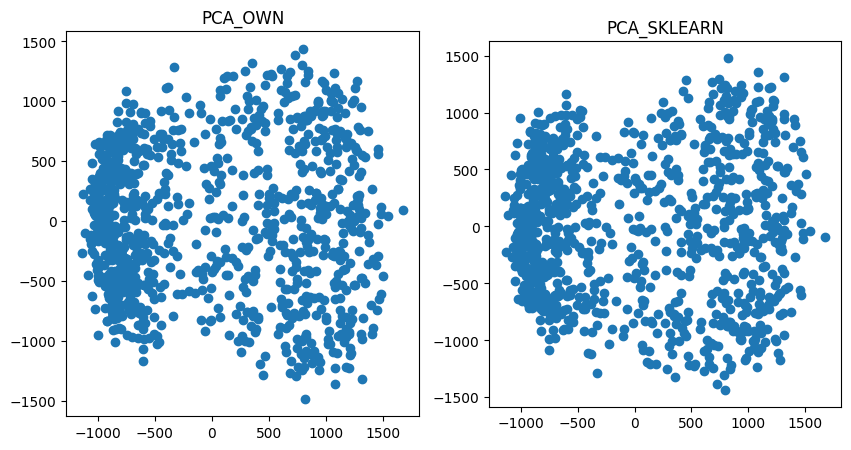

In [ ]:
X = X_sub[:1000]

X_pca = PCA_OWN(n_components=2).fit_transform(X)*(-1)
SK_pca= PCA(n_components=2).fit_transform(X)


# Asumiendo que tienes los datos transformados en una variable llamada X_pca
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_pca[:,0], X_pca[:,1])
axs[0].set_title('PCA_OWN')
axs[1].scatter(SK_pca[:, 0], SK_pca[:, 1])
axs[1].set_title('PCA_SKLEARN')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

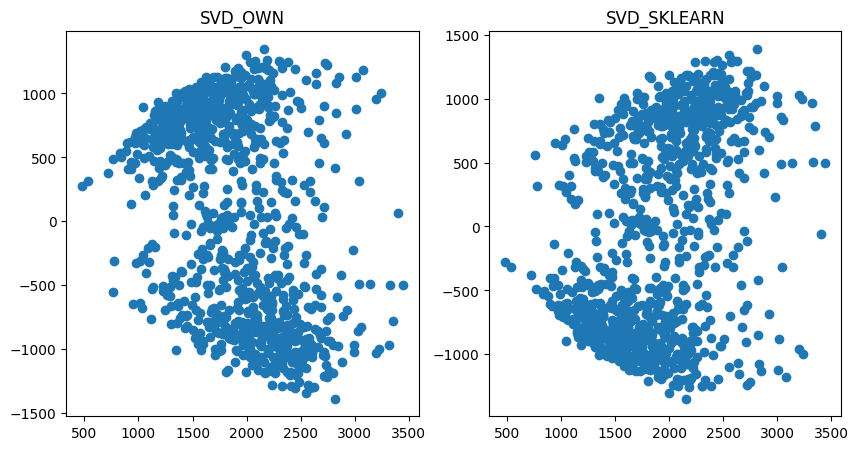

In [ ]:
svd =SVD_OWN(n_components=2)
svd.fit(X)
X_svd = svd.transform(X)

svd_SK = SVD(n_components=2, n_iter=7, random_state=42)
svd_SK.fit(X)
SK_svd = svd_SK.transform(X)
# Asumiendo que tienes los datos transformados en una variable llamada X_pca
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_svd[:, 0], X_svd[:, 1])
axs[0].set_title('SVD_OWN')
axs[1].scatter(SK_svd[:, 0], SK_svd[:, 1])
axs[1].set_title('SVD_SKLEARN')
plt.show()